In [2]:
import numpy as np
import pandas as pd

## Section 1: Data Preprocessing and Descriptive Statistics

### 1.1 Data Loading and Inspection 

In [3]:
orders = pd.read_csv("modded/df_Orders.csv")
customers = pd.read_csv("modded/df_Customers.csv")
payments = pd.read_csv("modded/df_Payments_new.csv")
order_items = pd.read_csv("modded/df_OrderItems_new.csv")
products=pd.read_csv("modded/df_Products_new.csv")

In [4]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [5]:
customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP
...,...,...,...,...
89311,bfJtzkBGksdY,94060,amparo,SP
89312,4hjsCpj6FC7g,99835,itapevi,SP
89313,DLn56oKHl9bv,2540,sao paulo,SP
89314,auSfRYUQUOIq,12288,paulinia,SP


In [6]:
products

,product_id,category,sub_category,stock_quantity
0,90K0C1fIyQUf,toys,misc,13
1,qejhpMGGVcsl,watches,gifts,3
2,qUS5d2pEAyxJ,costruction,tools garden,5
3,639iGvMyv0De,toys,misc,6
4,1lycYGcsic2F,toys,misc,13
...,...,...,...,...
89311,W8vikEizUggJ,toys,misc,1
89312,KXSbyJWtMMwZ,toys,misc,3
89313,EG4wDSpFyTth,health,beauty,206
89314,ZWyg4uNWPHjJ,toys,misc,110


In [7]:
payments

,order_id,payment_sequential,payment_type,installments,payment_value,payment_status
0,Axfy13Hk4PIk,1,credit_card,1,259.14,paid
1,v6px92oS8cLG,1,credit_card,8,382.39,paid
2,Ulpf9skrhjfm,1,credit_card,4,249.25,paid
3,bwJVWupf2keN,1,credit_card,2,27.79,paid
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15,paid
...,...,...,...,...,...,...
89311,zlcLnXGgAabl,1,wallet,1,128.00,paid
89312,IlTAoIkILwrq,1,wallet,1,106.86,paid
89313,uA6oXfftGVmT,1,credit_card,1,376.39,paid
89314,v3QtU6xlGDJp,1,voucher,1,48.05,paid


In [8]:
order_items

,order_id,product_id,seller_id,price,freight_value,quantity
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1
...,...,...,...,...,...,...
89311,zlcLnXGgAabl,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1
89312,IlTAoIkILwrq,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1
89313,uA6oXfftGVmT,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1
89314,v3QtU6xlGDJp,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1


In [9]:
customers.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
payments.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)

In [10]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [11]:
customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP
...,...,...,...,...
89311,bfJtzkBGksdY,94060,amparo,SP
89312,4hjsCpj6FC7g,99835,itapevi,SP
89313,DLn56oKHl9bv,2540,sao paulo,SP
89314,auSfRYUQUOIq,12288,paulinia,SP


In [12]:
products

,product_id,category,sub_category,stock_quantity
0,90K0C1fIyQUf,toys,misc,13
1,qejhpMGGVcsl,watches,gifts,3
2,qUS5d2pEAyxJ,costruction,tools garden,5
3,639iGvMyv0De,toys,misc,6
4,1lycYGcsic2F,toys,misc,13
...,...,...,...,...
89291,USSzekoHkA25,toys,misc,1
89297,SZRgDV7xa2U8,toys,misc,1
89303,w2OtdEjwNHBr,toys,misc,1
89311,W8vikEizUggJ,toys,misc,1


In [13]:
payments

,order_id,payment_sequential,payment_type,installments,payment_value,payment_status
0,Axfy13Hk4PIk,1,credit_card,1,259.14,paid
1,v6px92oS8cLG,1,credit_card,8,382.39,paid
2,Ulpf9skrhjfm,1,credit_card,4,249.25,paid
3,bwJVWupf2keN,1,credit_card,2,27.79,paid
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15,paid
...,...,...,...,...,...,...
89311,zlcLnXGgAabl,1,wallet,1,128.00,paid
89312,IlTAoIkILwrq,1,wallet,1,106.86,paid
89313,uA6oXfftGVmT,1,credit_card,1,376.39,paid
89314,v3QtU6xlGDJp,1,voucher,1,48.05,paid


In [14]:
order_items

,order_id,product_id,seller_id,price,freight_value,quantity
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1
...,...,...,...,...,...,...
89311,zlcLnXGgAabl,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1
89312,IlTAoIkILwrq,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1
89313,uA6oXfftGVmT,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1
89314,v3QtU6xlGDJp,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [17]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            89316 non-null  object 
 1   payment_sequential  89316 non-null  int64  
 2   payment_type        89316 non-null  object 
 3   installments        89316 non-null  int64  
 4   payment_value       89316 non-null  float64
 5   payment_status      89316 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.1+ MB


In [18]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       89316 non-null  object 
 1   product_id     89316 non-null  object 
 2   seller_id      89316 non-null  object 
 3   price          89316 non-null  float64
 4   freight_value  89316 non-null  float64
 5   quantity       89316 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27451 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      27451 non-null  object
 1   category        27451 non-null  object
 2   sub_category    27451 non-null  object
 3   stock_quantity  27451 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [20]:
orders.isnull().sum()
customers.isnull().sum()
payments.isnull().sum()
order_items.isnull().sum()
products.isnull().sum()

product_id        0
category          0
sub_category      0
stock_quantity    0
dtype: int64

In [21]:
orders.isna().sum()
customers.isna().sum()
payments.isna().sum()
order_items.isna().sum()
products.isna().sum()

product_id        0
category          0
sub_category      0
stock_quantity    0
dtype: int64

### 1.2 Data Type Conversion and Parsing Dates 

In [22]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [23]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [24]:
payments['payment_value'] = payments['payment_value'].astype(float)
order_items['price'] = order_items['price'].astype(float)

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 4.8+ MB


In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [27]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            89316 non-null  object 
 1   payment_sequential  89316 non-null  int64  
 2   payment_type        89316 non-null  object 
 3   installments        89316 non-null  int64  
 4   payment_value       89316 non-null  float64
 5   payment_status      89316 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.1+ MB


In [28]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       89316 non-null  object 
 1   product_id     89316 non-null  object 
 2   seller_id      89316 non-null  object 
 3   price          89316 non-null  float64
 4   freight_value  89316 non-null  float64
 5   quantity       89316 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 4.1+ MB


In [29]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27451 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      27451 non-null  object
 1   category        27451 non-null  object
 2   sub_category    27451 non-null  object
 3   stock_quantity  27451 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


### 1.3 Data Integration 

In [30]:
orders_full=orders.merge(customers, on='customer_id', how='left')  
orders_full= orders_full.merge(payments, on='order_id', how='left') 
orders_full=orders_full.merge(order_items, on='order_id', how='left') 
orders_full=orders_full.merge(products, on='product_id', how='left') 

In [31]:
order_item_counts = order_items.groupby('order_id').size().reset_index(name='item_count')
order_item_counts['item_count'].value_counts().head(10)

item_count
1    89316
Name: count, dtype: int64

In [32]:
orders_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,payment_value,payment_status,product_id,seller_id,price,freight_value,quantity,category,sub_category,stock_quantity
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,259.14,paid,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,toys,misc,13
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,...,382.39,paid,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,watches,gifts,3
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,...,249.25,paid,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,costruction,tools garden,5
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,...,27.79,paid,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,toys,misc,6
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,...,76.15,paid,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,toys,misc,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,...,128.00,paid,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,toys,misc,1
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,...,106.86,paid,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,toys,misc,3
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,...,376.39,paid,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,health,beauty,206
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,...,48.05,paid,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,toys,misc,110


In [33]:
orders_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
 7   customer_zip_code_prefix       89316 non-null  int64         
 8   customer_city                  89316 non-null  object        
 9   customer_state                 89316 non-null  object        
 10  payment_sequential             89316 non-null  int64         
 11  payment_type   

In [34]:
orders_full.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
installments                        0
payment_value                       0
payment_status                      0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
quantity                            0
category                            0
sub_category                        0
stock_quantity                      0
dtype: int64

### 1.4 Feature Engineering 

In [35]:
orders_full['order_date'] = pd.to_datetime(orders_full['order_purchase_timestamp'])
orders_full['order_month'] = orders_full['order_date'].dt.month
orders_full['order_day'] = orders_full['order_date'].dt.day
orders_full['order_hour'] = orders_full['order_date'].dt.hour

In [36]:
orders_full['order_value'] = orders_full['price'] * orders_full['quantity']

In [37]:
check = orders_full["price"] - orders_full["order_value"]
check.unique()

array([0.])

In [38]:
orders_full['shipping_cost_ratio'] = orders_full['freight_value'] / orders_full['order_value']

In [39]:
orders_full['delivery_time'] = (orders_full['order_delivered_timestamp'] - orders_full['order_approved_at']).dt.days

In [40]:
orders_full['estimated_vs_actual_delivery'] = orders_full['order_estimated_delivery_date'] - orders_full['order_delivered_timestamp'] 

In [41]:
orders_full.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'payment_sequential', 'payment_type',
       'installments', 'payment_value', 'payment_status', 'product_id',
       'seller_id', 'price', 'freight_value', 'quantity', 'category',
       'sub_category', 'stock_quantity', 'order_date', 'order_month',
       'order_day', 'order_hour', 'order_value', 'shipping_cost_ratio',
       'delivery_time', 'estimated_vs_actual_delivery'],
      dtype='object')

In [42]:
orders_full["order_status"].unique()

array(['delivered', 'canceled', 'shipped', 'processing', 'invoiced',
       'unavailable', 'approved'], dtype=object)

In [43]:
orders_full.groupby('order_status')['order_delivered_timestamp'].unique()

order_status
approved                                                   [NaT]
canceled       [NaT, 2016-11-09 14:53:50, 2016-10-19 18:47:43...
delivered      [2017-10-26 22:19:52, 2018-07-03 22:51:22, 201...
invoiced                                                   [NaT]
processing                                                 [NaT]
shipped                                                    [NaT]
unavailable                                                [NaT]
Name: order_delivered_timestamp, dtype: object

In [44]:
orders_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,sub_category,stock_quantity,order_date,order_month,order_day,order_hour,order_value,shipping_cost_ratio,delivery_time,estimated_vs_actual_delivery
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,misc,13,2017-10-22 18:57:54,10,22,18,223.51,0.378730,4.0,13 days 01:40:08
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,...,gifts,3,2018-06-20 21:40:31,6,20,21,170.80,0.139286,13.0,20 days 01:08:38
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,...,tools garden,5,2018-02-16 16:19:31,2,16,16,64.40,0.269876,9.0,8 days 22:30:10
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,...,misc,6,2018-08-18 18:04:29,8,18,18,264.50,0.116144,9.0,22 days 03:56:09
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,...,misc,13,2017-12-22 16:44:04,12,22,16,779.90,0.039313,14.0,12 days 04:37:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,...,misc,1,2018-08-19 17:25:36,8,19,17,31.99,5.897155,9.0,4 days 09:12:14
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,...,misc,3,2017-12-15 11:20:27,12,15,11,282.00,0.005816,4.0,14 days 04:36:20
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,...,beauty,206,2018-07-24 06:39:14,7,24,6,58.10,0.070396,2.0,4 days 22:18:20
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,...,misc,110,2018-08-11 08:04:22,8,11,8,2899.00,0.038982,3.0,2 days 02:16:09


### 1.5 Descriptive Statistics 

In [45]:
print("Mean Order Value:", orders_full['order_value'].mean())
print("Median Order Value:", orders_full['order_value'].median())
print("Mode Order Value:", orders_full['order_value'].mode())

Mean Order Value: 340.900542903847
Median Order Value: 136.9
Mode Order Value: 0    692.0
Name: order_value, dtype: float64


In [46]:
print("Mean Payment Value:", orders_full['payment_value'].mean())
print("Median Payment Value:", orders_full['payment_value'].median())
print("Mode Payment Value:", orders_full['payment_value'].mode())

Mean Payment Value: 268.65718986519767
Median Payment Value: 171.86
Mode Payment Value: 0    145.48
Name: payment_value, dtype: float64


In [47]:
print("Min Freight Value:", orders_full['freight_value'].min())
print("Max Freight Value:", orders_full['freight_value'].max())
print("Freight Range:", orders_full['freight_value'].max() - orders_full['freight_value'].min())


Min Freight Value: 0.0
Max Freight Value: 409.68
Freight Range: 409.68


In [48]:
print("Min Quantity:", orders_full['installments'].min())
print("Max Quantity:", orders_full['installments'].max())
print("Quantity Range:", orders_full['installments'].max() - orders_full['installments'].min())


Min Quantity: 0
Max Quantity: 24
Quantity Range: 24


In [49]:
print("Std of Freight Value:", orders_full['freight_value'].std())
print("Variance of Freight Value:", orders_full['freight_value'].var())

Std of Freight Value: 37.672491287608494
Variance of Freight Value: 1419.216599814938


In [50]:
print("Std of Payment Value:", orders_full['payment_value'].std())
print("Variance of Payment Value:", orders_full['payment_value'].var())

Std of Payment Value: 344.4095661155258
Variance of Payment Value: 118617.94923188473


In [51]:
print("Std of Delivery Time:", orders_full['delivery_time'].std())
print("Variance of Delivery Time:", orders_full['delivery_time'].var())

Std of Delivery Time: 9.241673711621615
Variance of Delivery Time: 85.40853299207804


In [52]:
print("Unique Products:", orders_full['product_id'].nunique())
print("Unique Categories:", orders_full['category'].nunique())
print("Unique Payment Types:", orders_full['payment_type'].nunique())
print("Unique Order Statuses:", orders_full['order_status'].nunique())

Unique Products: 27451
Unique Categories: 51
Unique Payment Types: 4
Unique Order Statuses: 7


In [53]:
print("Payment Type Frequency:\n", orders_full['payment_type'].value_counts())
print("Order Status Frequency:\n", orders_full['order_status'].value_counts())

Payment Type Frequency:
 payment_type
credit_card    65814
wallet         17302
voucher         4911
debit_card      1289
Name: count, dtype: int64
Order Status Frequency:
 order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64


In [54]:
print("Skewness - Payment Value:", orders_full['payment_value'].skew())
print("Kurtosis - Payment Value:", orders_full['payment_value'].kurtosis())

Skewness - Payment Value: 4.398856830119261
Kurtosis - Payment Value: 34.40479858676052


In [55]:
print("Skewness - Order Value:", orders_full['order_value'].skew())
print("Kurtosis - Order Value:", orders_full['order_value'].kurtosis())

Skewness - Order Value: 3.751492443276309
Kurtosis - Order Value: 17.077565307554337


### 1.6 Handling Missing Values 

In [56]:
orders_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,sub_category,stock_quantity,order_date,order_month,order_day,order_hour,order_value,shipping_cost_ratio,delivery_time,estimated_vs_actual_delivery
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,misc,13,2017-10-22 18:57:54,10,22,18,223.51,0.378730,4.0,13 days 01:40:08
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,...,gifts,3,2018-06-20 21:40:31,6,20,21,170.80,0.139286,13.0,20 days 01:08:38
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,...,tools garden,5,2018-02-16 16:19:31,2,16,16,64.40,0.269876,9.0,8 days 22:30:10
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,...,misc,6,2018-08-18 18:04:29,8,18,18,264.50,0.116144,9.0,22 days 03:56:09
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,...,misc,13,2017-12-22 16:44:04,12,22,16,779.90,0.039313,14.0,12 days 04:37:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,...,misc,1,2018-08-19 17:25:36,8,19,17,31.99,5.897155,9.0,4 days 09:12:14
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,...,misc,3,2017-12-15 11:20:27,12,15,11,282.00,0.005816,4.0,14 days 04:36:20
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,...,beauty,206,2018-07-24 06:39:14,7,24,6,58.10,0.070396,2.0,4 days 22:18:20
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,...,misc,110,2018-08-11 08:04:22,8,11,8,2899.00,0.038982,3.0,2 days 02:16:09


In [57]:
orders_full.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
installments                        0
payment_value                       0
payment_status                      0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
quantity                            0
category                            0
sub_category                        0
stock_quantity                      0
order_date                          0
order_month                         0
order_day                           0
order_hour  

In [58]:
orders_full['order_status'].unique()


array(['delivered', 'canceled', 'shipped', 'processing', 'invoiced',
       'unavailable', 'approved'], dtype=object)

In [59]:
orders_full.loc[
    orders_full['order_status'].isin(['invoiced', 'shipped', 'approved','unavailable', 'processing','canceled']),
    'order_delivered_timestamp'
] = pd.NaT


In [60]:
orders_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,sub_category,stock_quantity,order_date,order_month,order_day,order_hour,order_value,shipping_cost_ratio,delivery_time,estimated_vs_actual_delivery
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,misc,13,2017-10-22 18:57:54,10,22,18,223.51,0.378730,4.0,13 days 01:40:08
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,...,gifts,3,2018-06-20 21:40:31,6,20,21,170.80,0.139286,13.0,20 days 01:08:38
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,...,tools garden,5,2018-02-16 16:19:31,2,16,16,64.40,0.269876,9.0,8 days 22:30:10
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,...,misc,6,2018-08-18 18:04:29,8,18,18,264.50,0.116144,9.0,22 days 03:56:09
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,...,misc,13,2017-12-22 16:44:04,12,22,16,779.90,0.039313,14.0,12 days 04:37:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,...,misc,1,2018-08-19 17:25:36,8,19,17,31.99,5.897155,9.0,4 days 09:12:14
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,...,misc,3,2017-12-15 11:20:27,12,15,11,282.00,0.005816,4.0,14 days 04:36:20
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,...,beauty,206,2018-07-24 06:39:14,7,24,6,58.10,0.070396,2.0,4 days 22:18:20
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,...,misc,110,2018-08-11 08:04:22,8,11,8,2899.00,0.038982,3.0,2 days 02:16:09


In [61]:
orders_full.groupby('order_status')['order_approved_at'].unique()

order_status
approved              [2017-02-06 20:30:19, 2017-04-30 20:32:41]
canceled       [2017-07-24 11:50:18, 2017-07-29 13:05:18, 201...
delivered      [2017-10-22 19:14:13, 2018-06-20 22:20:20, 201...
invoiced       [2018-08-06 20:30:10, 2017-06-13 15:43:07, 201...
processing     [2018-02-04 14:35:32, 2017-05-04 16:55:23, 201...
shipped        [2017-02-04 13:10:38, 2017-05-09 09:35:20, 201...
unavailable           [2016-10-06 15:55:40, 2016-10-07 18:53:48]
Name: order_approved_at, dtype: object

In [62]:
orders_full["order_approved_at"].unique()

<DatetimeArray>
['2017-10-22 19:14:13', '2018-06-20 22:20:20', '2018-02-17 16:15:35',
 '2018-08-18 18:15:16', '2017-12-22 17:31:31', '2017-09-01 14:50:24',
 '2018-04-24 18:18:18', '2018-02-23 15:16:13', '2017-11-25 04:54:03',
 '2017-11-30 13:31:19',
 ...
 '2017-05-03 15:50:24', '2017-08-17 02:50:17', '2018-02-27 05:30:53',
 '2017-09-23 10:45:39', '2017-12-29 16:10:27', '2017-03-22 20:23:47',
 '2018-08-21 04:35:30', '2017-12-16 02:37:32', '2018-07-24 11:20:39',
 '2018-08-11 08:24:40']
Length: 68216, dtype: datetime64[ns]

In [63]:
orders_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,sub_category,stock_quantity,order_date,order_month,order_day,order_hour,order_value,shipping_cost_ratio,delivery_time,estimated_vs_actual_delivery
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,misc,13,2017-10-22 18:57:54,10,22,18,223.51,0.378730,4.0,13 days 01:40:08
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,...,gifts,3,2018-06-20 21:40:31,6,20,21,170.80,0.139286,13.0,20 days 01:08:38
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,...,tools garden,5,2018-02-16 16:19:31,2,16,16,64.40,0.269876,9.0,8 days 22:30:10
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,...,misc,6,2018-08-18 18:04:29,8,18,18,264.50,0.116144,9.0,22 days 03:56:09
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,...,misc,13,2017-12-22 16:44:04,12,22,16,779.90,0.039313,14.0,12 days 04:37:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,...,misc,1,2018-08-19 17:25:36,8,19,17,31.99,5.897155,9.0,4 days 09:12:14
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,...,misc,3,2017-12-15 11:20:27,12,15,11,282.00,0.005816,4.0,14 days 04:36:20
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,...,beauty,206,2018-07-24 06:39:14,7,24,6,58.10,0.070396,2.0,4 days 22:18:20
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,...,misc,110,2018-08-11 08:04:22,8,11,8,2899.00,0.038982,3.0,2 days 02:16:09


In [64]:
orders_full.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1894
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
installments                        0
payment_value                       0
payment_status                      0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
quantity                            0
category                            0
sub_category                        0
stock_quantity                      0
order_date                          0
order_month                         0
order_day                           0
order_hour  

In [65]:
""" #orders_full.loc[
    (orders_full['order_status'].isin(['approved','delivered'])) & 
    (orders_full['order_approved_at'].isna()),
    'order_approved_at'] = orders_full['order_purchase_timestamp'] """

" #orders_full.loc[\n    (orders_full['order_status'].isin(['approved','delivered'])) & \n    (orders_full['order_approved_at'].isna()),\n    'order_approved_at'] = orders_full['order_purchase_timestamp'] "

In [66]:
""" orders_full.loc[
    (orders_full['order_approved_at'].isna()),
    orders_full['order_status'].isin(['invoiced', 'shipped','unavailable', 'processing','canceled']),
    'order_approved_at'
] = pd.NaT """

" orders_full.loc[\n    (orders_full['order_approved_at'].isna()),\n    orders_full['order_status'].isin(['invoiced', 'shipped','unavailable', 'processing','canceled']),\n    'order_approved_at'\n] = pd.NaT "

In [67]:
orders_full['delivery_time'] = (orders_full['order_delivered_timestamp'] - orders_full['order_approved_at']).dt.days

In [68]:
orders_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,sub_category,stock_quantity,order_date,order_month,order_day,order_hour,order_value,shipping_cost_ratio,delivery_time,estimated_vs_actual_delivery
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,misc,13,2017-10-22 18:57:54,10,22,18,223.51,0.378730,4.0,13 days 01:40:08
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,...,gifts,3,2018-06-20 21:40:31,6,20,21,170.80,0.139286,13.0,20 days 01:08:38
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,...,tools garden,5,2018-02-16 16:19:31,2,16,16,64.40,0.269876,9.0,8 days 22:30:10
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,...,misc,6,2018-08-18 18:04:29,8,18,18,264.50,0.116144,9.0,22 days 03:56:09
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,...,misc,13,2017-12-22 16:44:04,12,22,16,779.90,0.039313,14.0,12 days 04:37:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,...,misc,1,2018-08-19 17:25:36,8,19,17,31.99,5.897155,9.0,4 days 09:12:14
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,...,misc,3,2017-12-15 11:20:27,12,15,11,282.00,0.005816,4.0,14 days 04:36:20
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,...,beauty,206,2018-07-24 06:39:14,7,24,6,58.10,0.070396,2.0,4 days 22:18:20
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,...,misc,110,2018-08-11 08:04:22,8,11,8,2899.00,0.038982,3.0,2 days 02:16:09


In [69]:
x = orders_full.select_dtypes(include='datetime')
orders_full[x.columns] = x.fillna(pd.NaT)

In [70]:
orders_full.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1894
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
installments                        0
payment_value                       0
payment_status                      0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
quantity                            0
category                            0
sub_category                        0
stock_quantity                      0
order_date                          0
order_month                         0
order_day                           0
order_hour  

In [71]:
orders_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,sub_category,stock_quantity,order_date,order_month,order_day,order_hour,order_value,shipping_cost_ratio,delivery_time,estimated_vs_actual_delivery
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,misc,13,2017-10-22 18:57:54,10,22,18,223.51,0.378730,4.0,13 days 01:40:08
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,...,gifts,3,2018-06-20 21:40:31,6,20,21,170.80,0.139286,13.0,20 days 01:08:38
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,...,tools garden,5,2018-02-16 16:19:31,2,16,16,64.40,0.269876,9.0,8 days 22:30:10
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,...,misc,6,2018-08-18 18:04:29,8,18,18,264.50,0.116144,9.0,22 days 03:56:09
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,...,misc,13,2017-12-22 16:44:04,12,22,16,779.90,0.039313,14.0,12 days 04:37:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,...,misc,1,2018-08-19 17:25:36,8,19,17,31.99,5.897155,9.0,4 days 09:12:14
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,...,misc,3,2017-12-15 11:20:27,12,15,11,282.00,0.005816,4.0,14 days 04:36:20
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,...,beauty,206,2018-07-24 06:39:14,7,24,6,58.10,0.070396,2.0,4 days 22:18:20
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,...,misc,110,2018-08-11 08:04:22,8,11,8,2899.00,0.038982,3.0,2 days 02:16:09


In [72]:
orders_full.reset_index(inplace=True)

In [73]:
orders_full

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,...,sub_category,stock_quantity,order_date,order_month,order_day,order_hour,order_value,shipping_cost_ratio,delivery_time,estimated_vs_actual_delivery
0,0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,...,misc,13,2017-10-22 18:57:54,10,22,18,223.51,0.378730,4.0,13 days 01:40:08
1,1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,...,gifts,3,2018-06-20 21:40:31,6,20,21,170.80,0.139286,13.0,20 days 01:08:38
2,2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,...,tools garden,5,2018-02-16 16:19:31,2,16,16,64.40,0.269876,9.0,8 days 22:30:10
3,3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,...,misc,6,2018-08-18 18:04:29,8,18,18,264.50,0.116144,9.0,22 days 03:56:09
4,4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,...,misc,13,2017-12-22 16:44:04,12,22,16,779.90,0.039313,14.0,12 days 04:37:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,...,misc,1,2018-08-19 17:25:36,8,19,17,31.99,5.897155,9.0,4 days 09:12:14
89312,89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,...,misc,3,2017-12-15 11:20:27,12,15,11,282.00,0.005816,4.0,14 days 04:36:20
89313,89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,...,beauty,206,2018-07-24 06:39:14,7,24,6,58.10,0.070396,2.0,4 days 22:18:20
89314,89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,...,misc,110,2018-08-11 08:04:22,8,11,8,2899.00,0.038982,3.0,2 days 02:16:09


In [74]:
orders_full = orders_full.drop(columns=["index"])
orders_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,sub_category,stock_quantity,order_date,order_month,order_day,order_hour,order_value,shipping_cost_ratio,delivery_time,estimated_vs_actual_delivery
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,misc,13,2017-10-22 18:57:54,10,22,18,223.51,0.378730,4.0,13 days 01:40:08
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,...,gifts,3,2018-06-20 21:40:31,6,20,21,170.80,0.139286,13.0,20 days 01:08:38
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,...,tools garden,5,2018-02-16 16:19:31,2,16,16,64.40,0.269876,9.0,8 days 22:30:10
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,...,misc,6,2018-08-18 18:04:29,8,18,18,264.50,0.116144,9.0,22 days 03:56:09
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,...,misc,13,2017-12-22 16:44:04,12,22,16,779.90,0.039313,14.0,12 days 04:37:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,...,misc,1,2018-08-19 17:25:36,8,19,17,31.99,5.897155,9.0,4 days 09:12:14
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,...,misc,3,2017-12-15 11:20:27,12,15,11,282.00,0.005816,4.0,14 days 04:36:20
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,...,beauty,206,2018-07-24 06:39:14,7,24,6,58.10,0.070396,2.0,4 days 22:18:20
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,...,misc,110,2018-08-11 08:04:22,8,11,8,2899.00,0.038982,3.0,2 days 02:16:09


In [75]:
orders_full.to_csv("mergedData.csv",index=False)

# Section 2 Exploratory Data Analysis (EDA) for Data Understanding 

## 2.1 Univariate Aalysis

#### Order Value and Payment Value

In [78]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [79]:

orders_full['order_value'].describe().astype('int')

count    89316
mean       340
std        557
min          0
25%         59
50%        136
75%        399
max       6735
Name: order_value, dtype: int32

<Axes: title={'center': 'Order Value Distribution'}, ylabel='Frequency'>

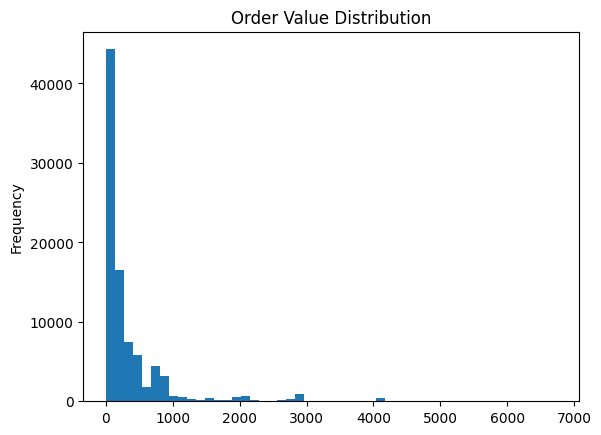

In [83]:
orders_full['order_value'].plot(kind="hist", bins=50, title='Order Value Distribution')

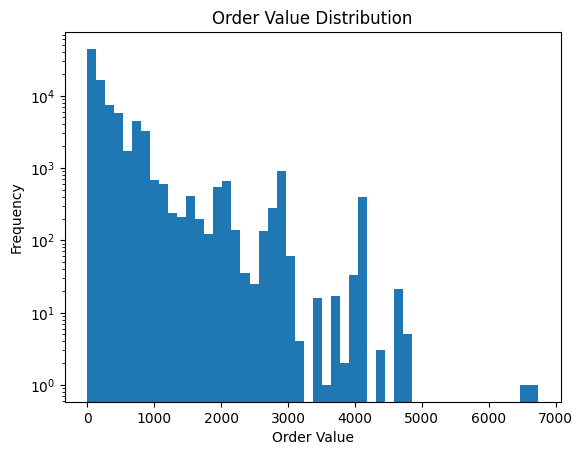

In [84]:
plt.hist(orders_full["order_value"],bins=50)
plt.title('Order Value Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.yscale("log")
plt.show()

In [81]:
orders_full['payment_value'].describe().astype('int')

count    89316
mean       268
std        344
min          0
25%         84
50%        171
75%        313
max       7274
Name: payment_value, dtype: int32

<Axes: title={'center': 'Payment Value Distribution'}, ylabel='Frequency'>

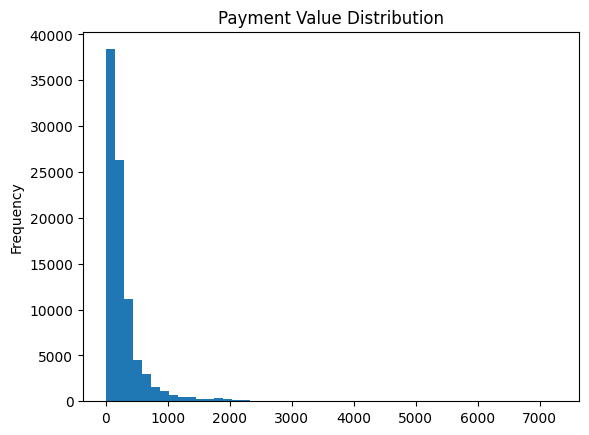

In [85]:
orders_full['payment_value'].plot(kind="hist", bins=50, title='Payment Value Distribution')

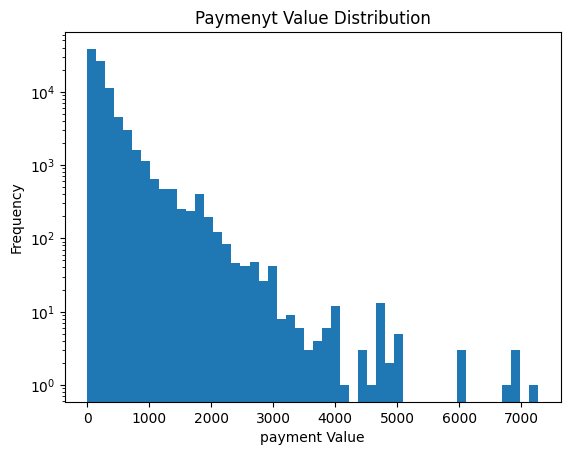

In [86]:
plt.hist(orders_full["payment_value"],bins=50)
plt.title('Paymenyt Value Distribution')
plt.xlabel('payment Value')
plt.ylabel('Frequency')
plt.yscale("log")
plt.show()

#### Freight Charges

In [87]:
orders_full['freight_value'].describe()

count    89316.000000
mean        44.283210
std         37.672491
min          0.000000
25%         20.110000
50%         35.055000
75%         57.190000
max        409.680000
Name: freight_value, dtype: float64

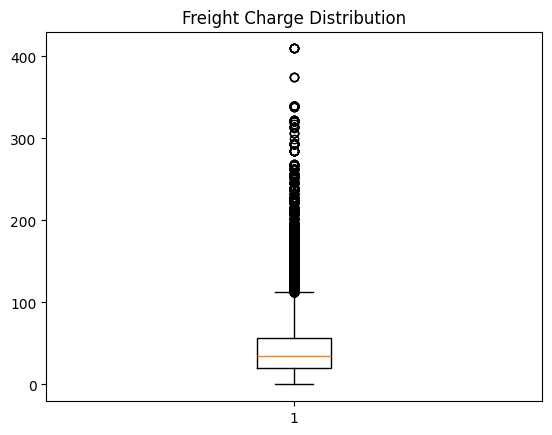

In [90]:
plt.boxplot(orders_full['freight_value'])
plt.title('Freight Charge Distribution')
plt.show()

In [91]:
orders_full.groupby('order_status')['freight_value'].mean().sort_values(ascending=False)

order_status
approved       56.655000
processing     51.378498
shipped        45.777457
invoiced       45.101429
delivered      44.246573
canceled       43.425672
unavailable    32.180000
Name: freight_value, dtype: float64

This suggests freight cost alone is not causing order cancellation.

#### Order Quantity

<Axes: xlabel='items_per_order', ylabel='Count'>

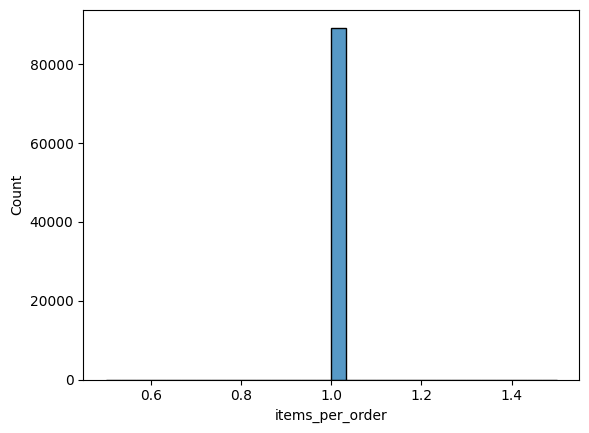

In [92]:
order_qty = orders_full.groupby('order_id')['product_id'].count().reset_index(name='items_per_order')
order_qty['items_per_order'].value_counts().sort_index()
sns.histplot(order_qty['items_per_order'], bins=30)

#### Customer Region

In [93]:
orders_full.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)

customer_state
SP    37879
RJ    11578
MG    10334
RS     4921
PR     4523
SC     3213
BA     3088
GO     1868
ES     1798
DF     1793
PE     1493
CE     1141
MT      848
PA      817
MS      637
MA      623
PB      497
PI      423
RN      381
AL      342
SE      305
TO      247
RO      241
AM      140
AC       75
AP       68
RR       43
Name: order_id, dtype: int64

<Axes: xlabel='customer_state'>

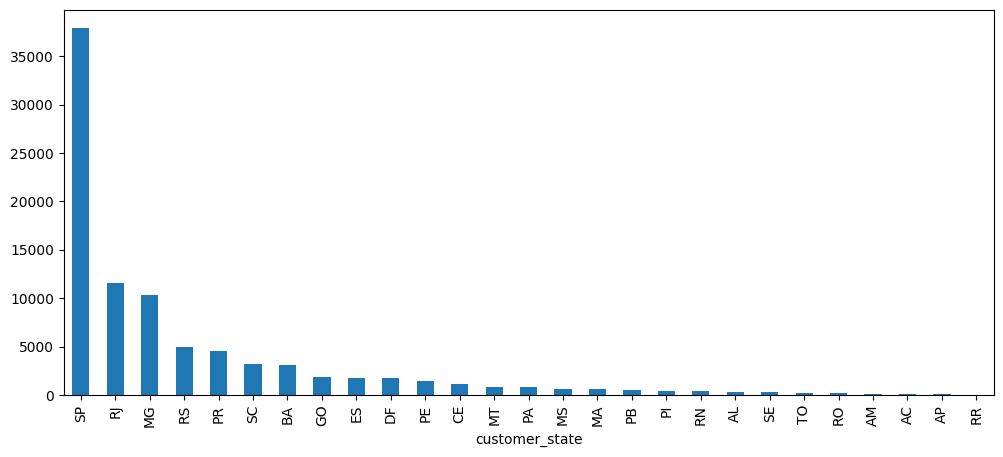

In [94]:
orders_full['customer_state'].value_counts().plot(kind='bar', figsize=(12, 5))

#### Product Categories and Subcategories

In [95]:
orders_full['category'].value_counts().head()

category
toys         67027
health        2351
bed           2146
furniture     1859
sports        1837
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

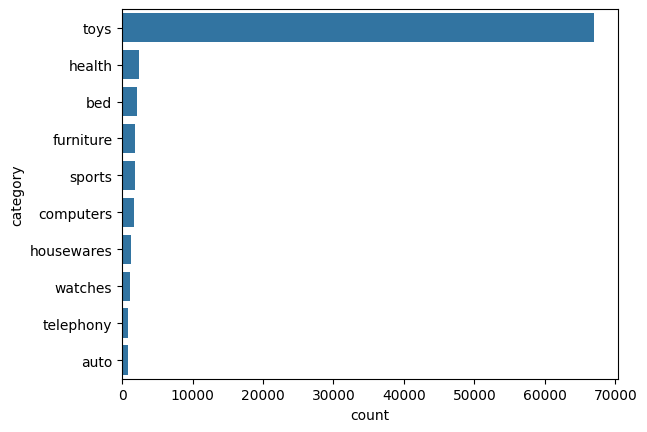

In [96]:
sns.countplot(y='category', data=orders_full, order=orders_full['category'].value_counts().index[:10])

#### Order Status

In [97]:
orders_full.groupby('order_status')['order_status'].value_counts()

order_status
approved           2
canceled         409
delivered      87428
invoiced         266
processing       273
shipped          936
unavailable        2
Name: count, dtype: int64

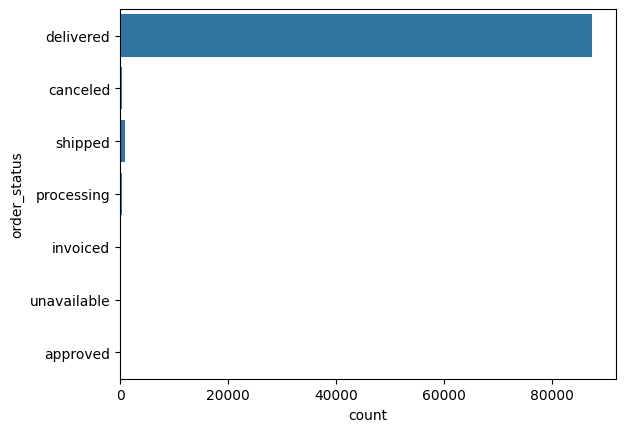

In [98]:
sns.countplot(data = orders_full, y = 'order_status')
plt.show()

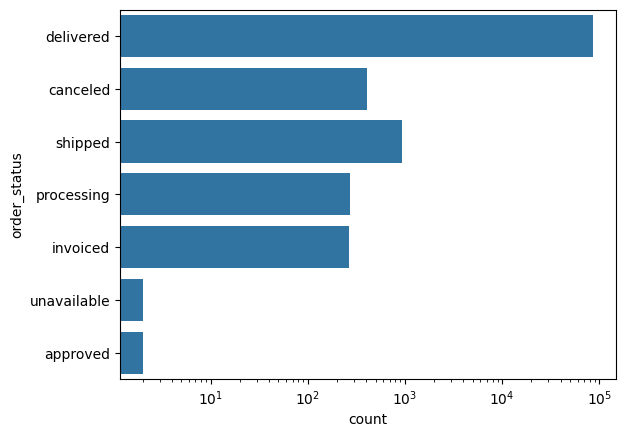

In [99]:
sns.countplot(data = orders_full, y = 'order_status')
plt.xscale('log')
plt.show()

#### Payment Type

In [100]:
orders_full.groupby('payment_type')['payment_type'].value_counts()

payment_type
credit_card    65814
debit_card      1289
voucher         4911
wallet         17302
Name: count, dtype: int64

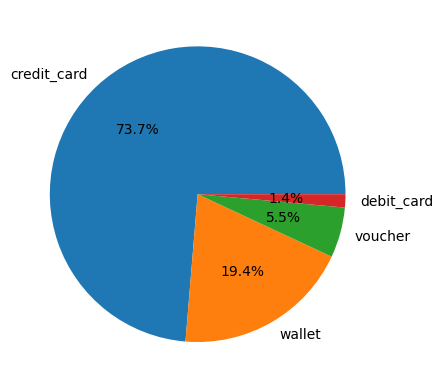

In [101]:
payment_count = orders_full['payment_type'].value_counts()
plt.pie(payment_count, labels=payment_count.index,autopct='%1.1f%%')
plt.show()

## 2.2 Bivariate Analysis

#### Relationship between Order Value and Payment Value

In [102]:
orders_full['payment_difference'] = orders_full['payment_value'] - orders_full['order_value']
orders_full[['payment_difference', 'payment_value', 'order_value']].describe().astype('int')

,payment_difference,payment_value,order_value
count,89316,89316,89316
mean,-72,268,340
std,651,344,557
min,-6669,0,0
25%,-187,84,59
50%,12,171,136
75%,160,313,399
max,7049,7274,6735


In 50% of transactions, payment value is less than order_value. It may be due to discount coupons

#### Freight Cost vs Order Value

In [103]:
orders_full[['order_value', 'freight_value']].corr()


,order_value,freight_value
order_value,1.00000,-0.00636
freight_value,-0.00636,1.00000


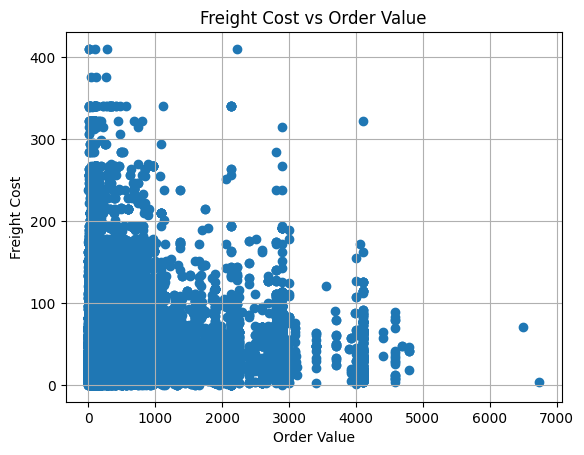

In [107]:
plt.scatter(
    orders_full['order_value'], 
    orders_full['freight_value'], 
)
plt.title('Freight Cost vs Order Value')
plt.xlabel('Order Value')
plt.ylabel('Freight Cost')
plt.grid(True)
plt.show()

There is no relationship between order_value and freight_value

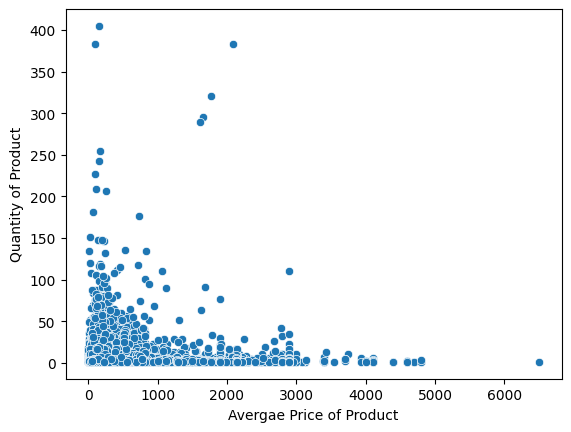

In [104]:
pt = pd.pivot_table(orders_full, index='product_id', values=['price', 'quantity'], aggfunc={'price': 'mean', 'quantity': 'sum'} )
sns.scatterplot(data=pt, x='price', y='quantity')
plt.xlabel('Avergae Price of Product')
plt.ylabel('Quantity of Product')
plt.show()

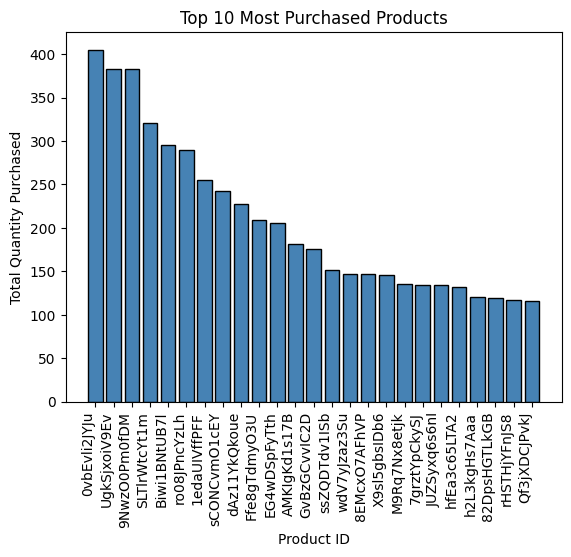

In [106]:
pivot = orders_full.pivot_table(
    index="product_id",
    values=['price', 'quantity'],
    aggfunc={'price': 'mean', 'quantity': 'sum'}
).round(3)

top_purchased = pivot.sort_values(by='quantity', ascending=False).head(25)

plt.bar(top_purchased.index, top_purchased['quantity'], color='steelblue', edgecolor='black')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=90, ha='right')
plt.show()

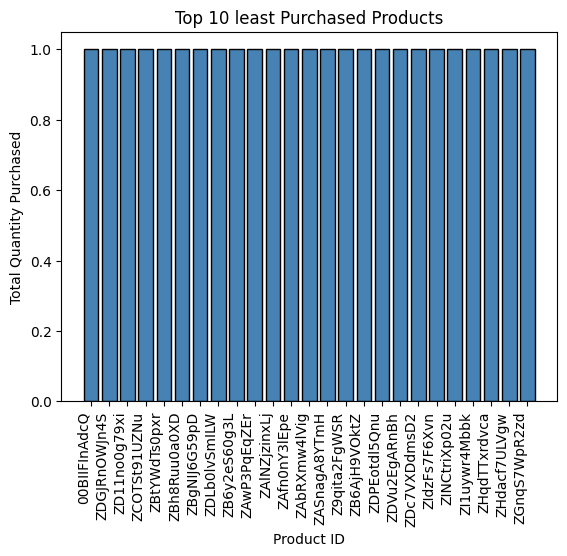

In [108]:
top_purchased = pivot.sort_values(by='quantity', ascending=True).head(25)

plt.bar(top_purchased.index, top_purchased['quantity'], color='steelblue', edgecolor='black')
plt.title('Top 10 least Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=90, ha='right')
plt.show()

#### Order Value across Customer Regions

In [112]:
state_avg_order = orders_full.pivot_table(
    values='order_value', 
    aggfunc='mean', 
    index='customer_state'
).sort_values(by='order_value', ascending=False)
state_avg_order

,order_value
customer_state,
RO,425.359419
PA,372.809731
GO,366.412082
PB,361.111368
RN,360.714331
CE,360.117555
PE,359.028480
PR,355.354875
MA,347.466003


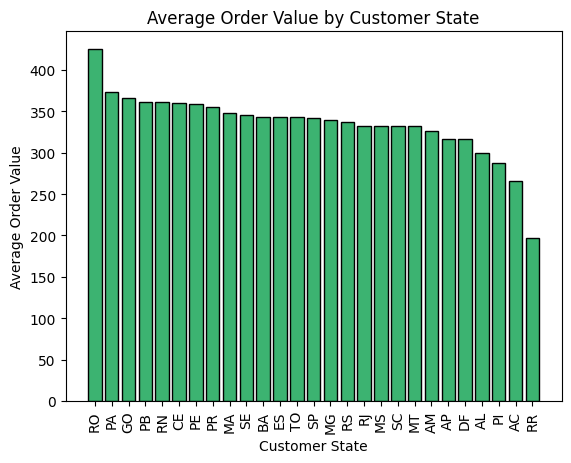

In [113]:
plt.bar(state_avg_order.index, state_avg_order['order_value'], color='mediumseagreen', edgecolor='black')
plt.title('Average Order Value by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.show()

#### Payment Type vs Order Status

In [114]:
ct = pd.crosstab(index=orders_full['payment_type'], 
                 columns=orders_full['order_status'], 
                 normalize='index') * 100
ct

order_status,approved,canceled,delivered,invoiced,processing,shipped,unavailable
payment_type,,,,,,,
credit_card,0.003039,0.460388,97.904701,0.273498,0.287173,1.068162,0.003039
debit_card,0.000000,0.465477,98.060512,0.310318,0.155159,1.008534,0.000000
voucher,0.000000,0.509061,97.536143,0.223987,0.346162,1.384647,0.000000
wallet,0.000000,0.433476,97.901977,0.410357,0.375679,0.878511,0.000000


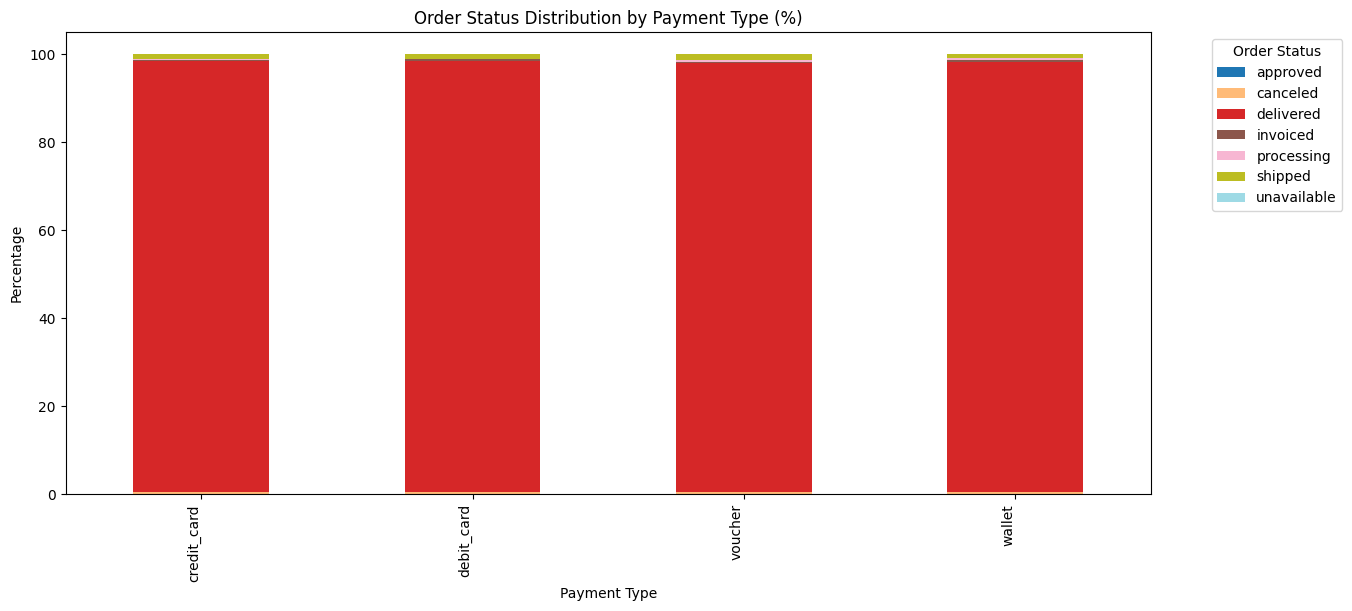

In [115]:
ct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Order Status Distribution by Payment Type (%)')
plt.ylabel('Percentage')
plt.xlabel('Payment Type')
plt.xticks(rotation=90, ha="right")
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Order Status by Product Category

In [117]:
ct = pd.crosstab(
    index = orders_full.category, 
    columns=orders_full.order_status, 
    normalize="index") * 100
ct

order_status,approved,canceled,delivered,invoiced,processing,shipped,unavailable
category,,,,,,,
agro,0.000000,0.000000,97.014925,0.000000,0.000000,2.985075,0.000000
air,0.000000,1.298701,98.701299,0.000000,0.000000,0.000000,0.000000
art,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
arts,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
audio,0.000000,0.934579,98.130841,0.000000,0.000000,0.934579,0.000000
auto,0.000000,0.361882,98.069964,0.120627,0.482509,0.965018,0.000000
baby,0.000000,0.966184,96.457327,0.644122,0.322061,1.449275,0.161031
bed,0.000000,0.046598,98.741845,0.232992,0.093197,0.885368,0.000000
books,0.000000,1.149425,95.402299,1.149425,1.724138,0.574713,0.000000


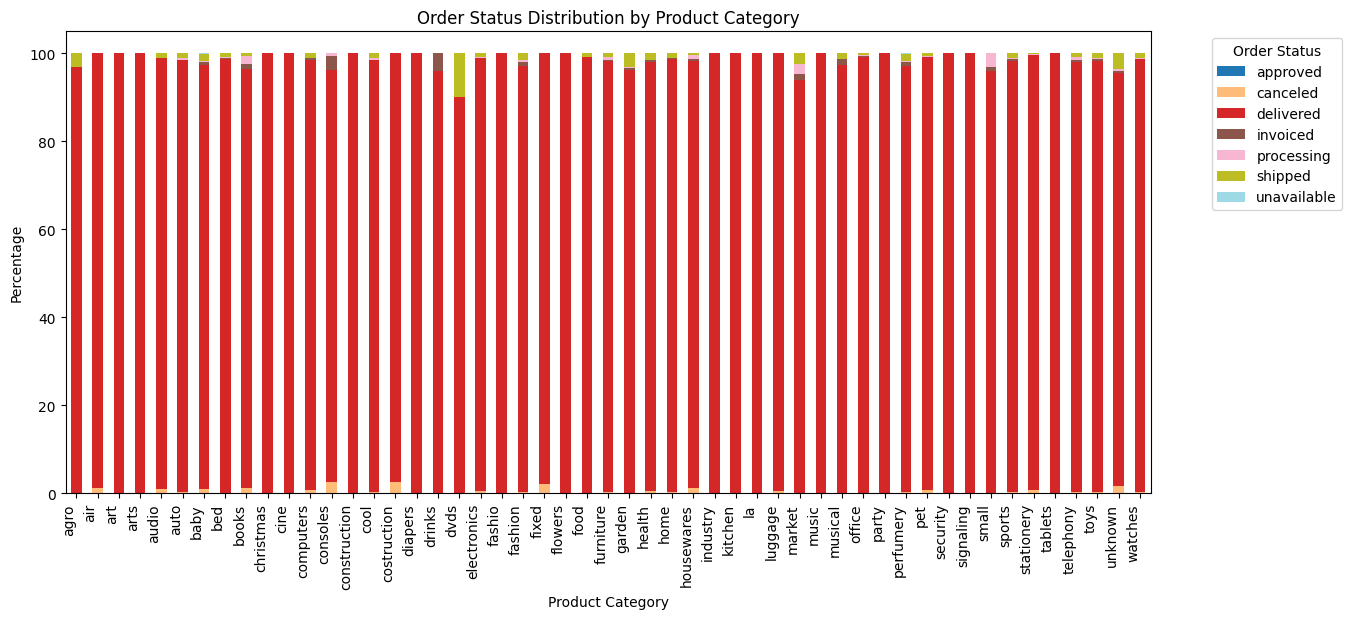

In [118]:
ct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Order Status Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Consoles and stationary are canceled more as compare to other product category

## 2.3 Time based analysis

#### Monthly/Weekly Order Trends

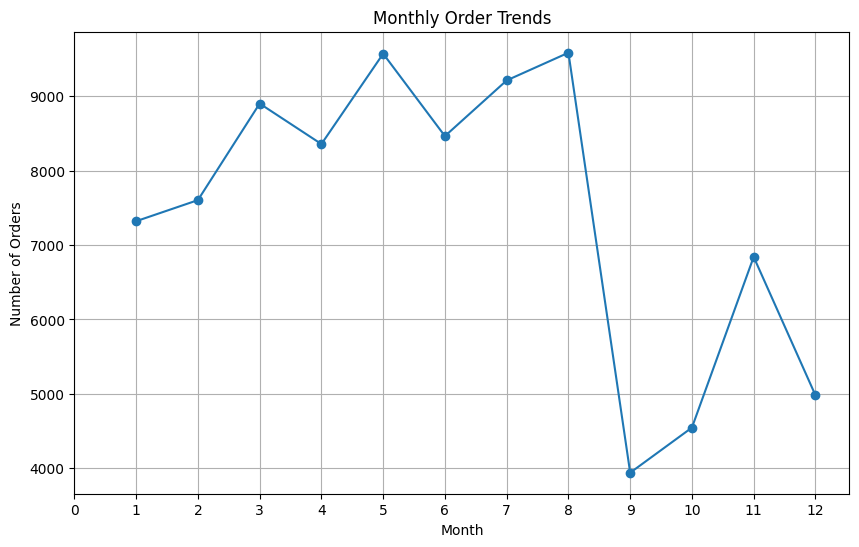

In [122]:
monthly_orders = orders_full.groupby('order_month').size()
monthly_orders.plot(kind='line', marker='o', figsize=(10, 6), title='Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks([i for i in range(13)])
plt.show()

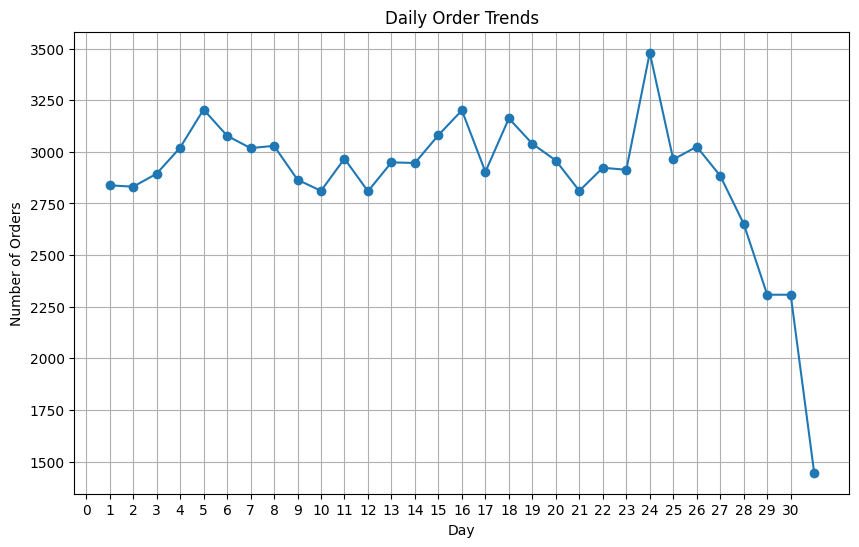

In [123]:
monthly_orders = orders_full.groupby('order_day').size()
monthly_orders.plot(kind='line', marker='o', figsize=(10, 6), title='Daily Order Trends')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks([i for i in range(31)])
plt.show()

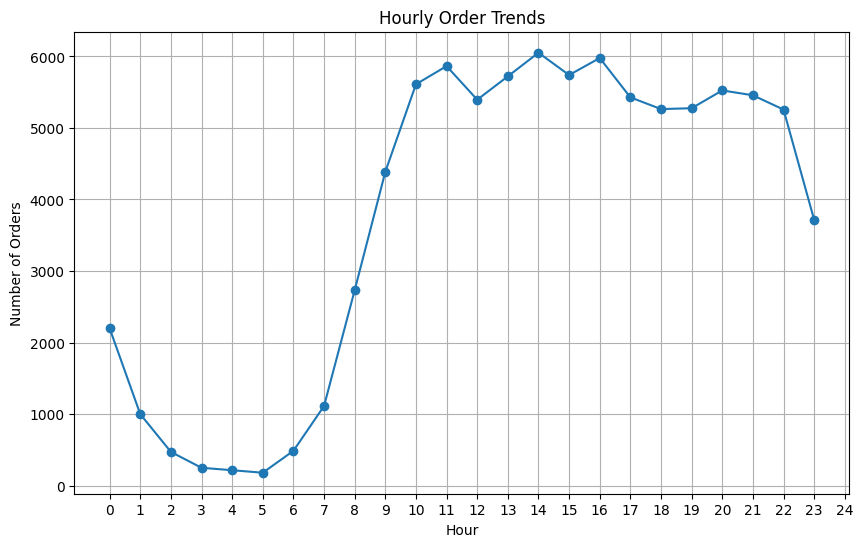

In [124]:
monthly_orders = orders_full.groupby('order_hour').size()
monthly_orders.plot(kind='line', marker='o', figsize=(10, 6), title='Hourly Order Trends')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks([i for i in range(25)])
plt.show()

#### Delivery Timelines vs Estimated Delivery

In [120]:
orders_full['delivery_performance'] = (orders_full['order_delivered_timestamp'] - orders_full['order_estimated_delivery_date']).dt.days
print("Average delay (days):", orders_full['delivery_performance'].mean())
print("Median delay (days):", orders_full['delivery_performance'].median())
print("Max delay (days):", orders_full['delivery_performance'].max())
print("Min (earliest) delivery (days):", orders_full['delivery_performance'].min())

Average delay (days): -12.131420008693464
Median delay (days): -13.0
Max delay (days): 188.0
Min (earliest) delivery (days): -147.0


## 2.4 Segment-Specific Trend

#### Customer Segments by Region and Spend

In [119]:
customer_spend = orders_full.groupby(['customer_id', 'customer_state'])['order_value'].sum().reset_index()
customer_spend.rename(columns={'order_value': 'total_spend'}, inplace=True)
# Cut into 3 tiers: Low, Medium, High
customer_spend['spend_segment'] = pd.qcut(customer_spend['total_spend'], q=3, labels=['Low', 'Medium', 'High'])
segment_by_state = customer_spend.groupby(['customer_state', 'spend_segment']).size().unstack().fillna(0)
print(segment_by_state)

spend_segment     Low  Medium   High
customer_state                      
AC                 28      31     16
AL                124     107    111
AM                 54      40     46
AP                 22      26     20
BA               1091     944   1053
CE                371     391    379
DF                620     616    557
ES                649     565    584
GO                640     584    644
MA                197     224    202
MG               3434    3475   3425
MS                231     212    194
MT                296     260    292
PA                289     248    280
PB                168     162    167
PE                491     471    531
PI                153     139    131
PR               1424    1497   1602
RJ               3980    3839   3759
RN                121     126    134
RO                 67      75     99
RR                 13      21      9
RS               1692    1603   1626
SC               1082    1097   1034
SE                111      92    102
S

C:\Users\tarun\AppData\Local\Temp\ipykernel_16124\1723446196.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_by_state = customer_spend.groupby(['customer_state', 'spend_segment']).size().unstack().fillna(0)


#### Product Segment Performance: 

In [125]:
category_perf = orders_full.groupby('category').agg({
    'order_value': 'sum',       # Total revenue
    'quantity': 'sum',          # Units sold
    'order_id': 'nunique'       # Unique orders
}).rename(columns={
    'order_value': 'total_revenue',
    'quantity': 'total_quantity',
    'order_id': 'num_orders'
})
category_perf


,total_revenue,total_quantity,num_orders
category,,,
agro,22105.33,67,67
air,22312.03,77,77
art,3809.13,13,13
arts,2017.44,4,4
audio,21461.18,107,107
auto,233702.18,829,829
baby,182532.56,621,621
bed,604534.89,2146,2146
books,44413.89,174,174


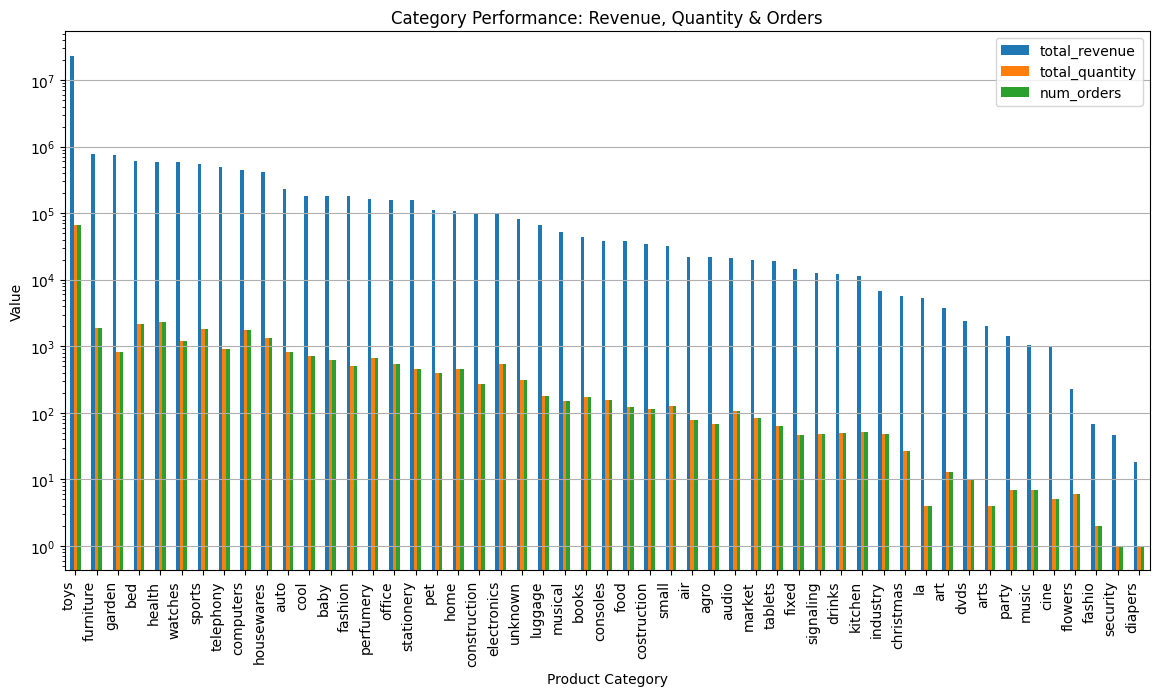

In [126]:
category_perf_sorted = category_perf.sort_values(by='total_revenue', ascending=False)

category_perf_sorted.plot(
    kind='bar',
    figsize=(14, 7),
)

plt.title('Category Performance: Revenue, Quantity & Orders')
plt.ylabel('Value')
plt.xlabel('Product Category')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
plt.yscale("log")
plt.show()

In [127]:
product_perf = orders_full.groupby('product_id').agg({
    'order_value': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique',
    'price': 'mean',
    'category': 'first'
}).rename(columns={
    'order_value': 'total_revenue',
    'quantity': 'total_quantity',
    'order_id': 'num_orders',
    'price': 'avg_price'
})
product_perf

,total_revenue,total_quantity,num_orders,avg_price,category
product_id,,,,,
00BIIFInAdcQ,51.99,1,1,51.99,health
00FVdl7l7TLz,404.88,1,1,404.88,toys
00MeCa7ZMo03,420.07,1,1,420.07,toys
00V9K0LkMBYL,538.90,1,1,538.90,toys
00ehq6lzh6MX,4079.92,8,8,509.99,auto
...,...,...,...,...,...
zzVsv7FKKs9m,3119.60,4,4,779.90,housewares
zzddahYAwwwB,113.78,2,2,56.89,toys
zzqhFv79Esms,558.50,1,1,558.50,toys


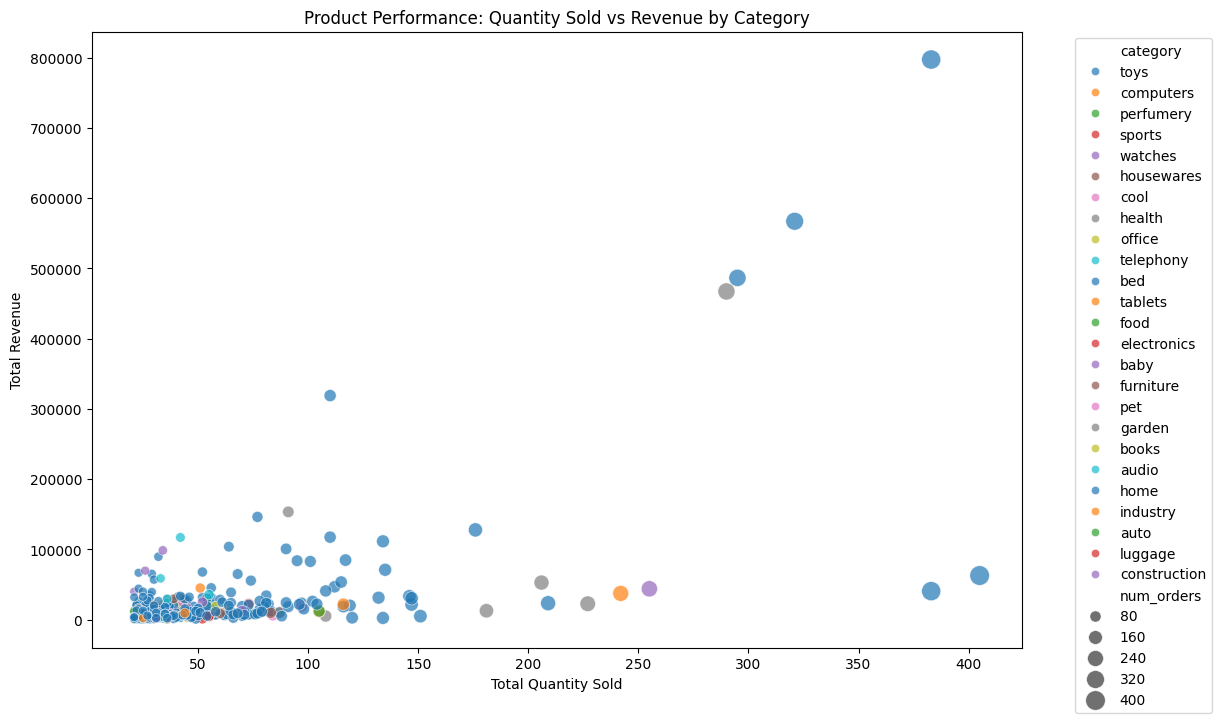

In [128]:
filtered = product_perf[product_perf['num_orders'] > 20]

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=filtered,
    x='total_quantity',
    y='total_revenue',
    hue='category',
    size='num_orders',
    sizes=(40, 200),
    alpha=0.7,
    palette='tab10'
)
plt.title('Product Performance: Quantity Sold vs Revenue by Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Revenue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Repeat vs One-Time Customers

In [129]:
customer_orders = orders_full.groupby('customer_id')['order_id'].nunique().reset_index()
customer_orders.columns = ['customer_id', 'order_count']

orders_labeled = orders_full.merge(customer_orders, on='customer_id', how='left')

orders_labeled['buyer_type'] = orders_labeled['order_count'].apply(lambda x: 'Loyal' if x > 1 else 'One-Time')

In [130]:
# Aggregated behavior comparison
behavior_summary = orders_labeled.groupby('buyer_type').agg({
    'order_value': 'mean',
    'freight_value': 'mean',
    'delivery_time': 'mean',
    'installments': 'mean',
    'order_id': 'nunique',
    'product_id': 'nunique'
}).rename(columns={
    'order_value': 'Avg Order Value',
    'freight_value': 'Avg Shipping Cost',
    'delivery_time': 'Avg Delivery Time',
    'installments': 'Avg Installments',
    'order_id': 'Total Orders',
    'product_id': 'Unique Products'
})

behavior_summary


,Avg Order Value,Avg Shipping Cost,Avg Delivery Time,Avg Installments,Total Orders,Unique Products
buyer_type,,,,,,
One-Time,340.900543,44.28321,11.514351,2.965717,89316,27451


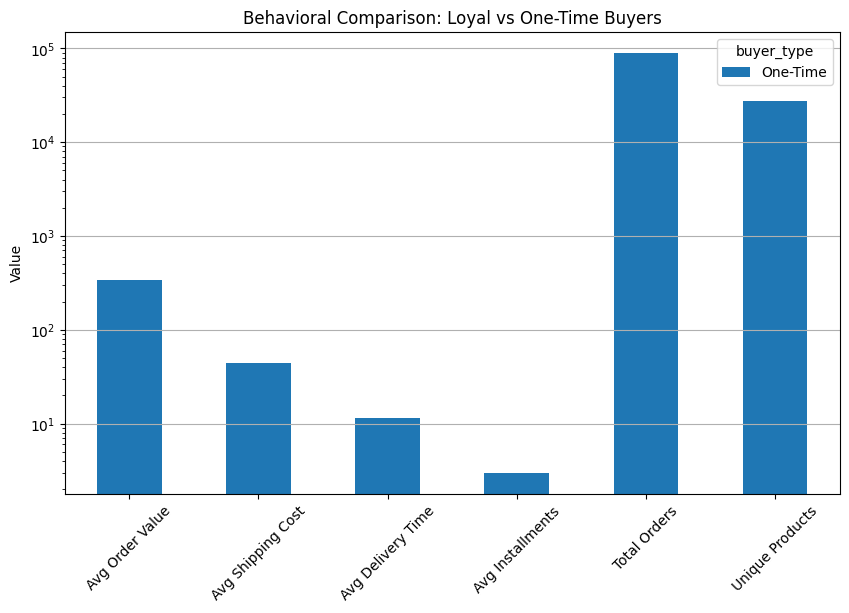

In [131]:
behavior_summary.T.plot(kind='bar', figsize=(10,6), rot=45)
plt.title('Behavioral Comparison: Loyal vs One-Time Buyers')
plt.ylabel('Value')
plt.grid(axis='y')
plt.yscale("log")
plt.show()


## Section 3 : Hypothesis Testing

C:\Users\srini\AppData\Local\Temp\ipykernel_26520\2279373284.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_order_total = df_orderitems.groupby('order_id').apply(


Merged DataFrame preview:
       order_id   customer_id order_status order_purchase_timestamp  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ    delivered      2017-10-22 18:57:54   
1  v6px92oS8cLG  PxA7fv9spyhx    delivered      2018-06-20 21:40:31   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw    delivered      2018-02-16 16:19:31   
3  bwJVWupf2keN  EOEsCQ6QlpIg    delivered      2018-08-18 18:04:29   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL    delivered      2017-12-22 16:44:04   

     order_approved_at order_delivered_timestamp  \
0  2017-10-22 19:14:13       2017-10-26 22:19:52   
1  2018-06-20 22:20:20       2018-07-03 22:51:22   
2  2018-02-17 16:15:35       2018-02-27 01:29:50   
3  2018-08-18 18:15:16       2018-08-27 20:03:51   
4  2017-12-22 17:31:31       2018-01-05 19:22:49   

  order_estimated_delivery_date  order_total_value customer_state  
0                    2017-11-09             308.16             SP  
1                    2018-07-24             194.59             RJ  
2                    2018-03-0

C:\Users\srini\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


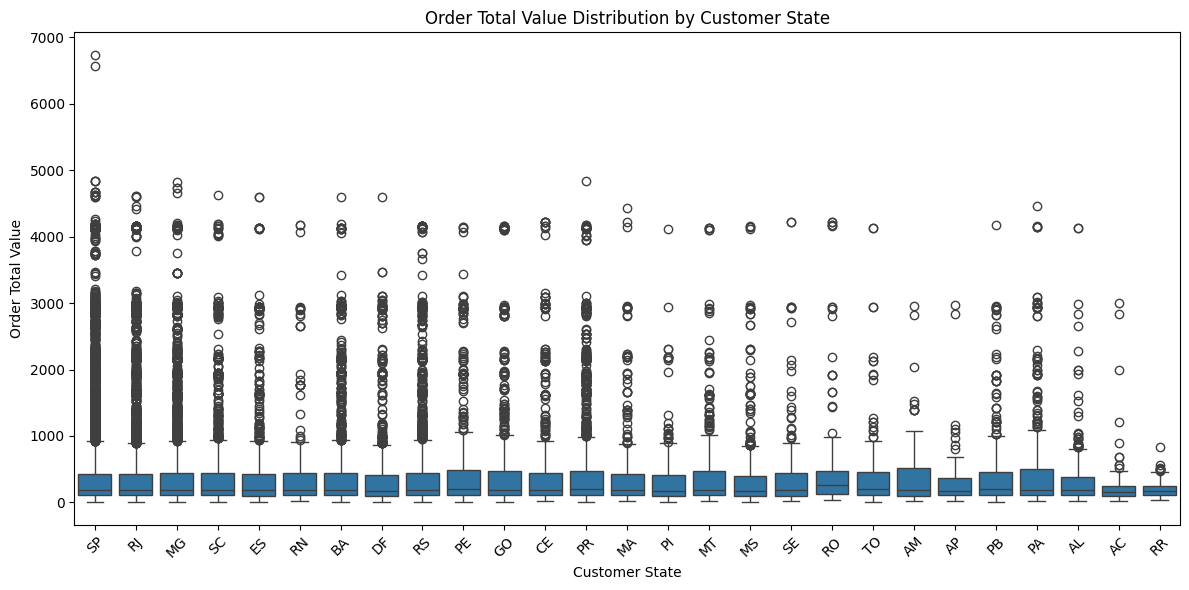


ANOVA Test Results:
                         sum_sq       df         F    PR(>F)
C(customer_state)  1.336808e+07     26.0  1.648707  0.019971
Residual           2.784520e+10  89289.0       NaN       NaN

Shapiro-Wilk Test on model residuals:
Statistic: 0.5695, p-value: 0.0000
Residuals may deviate from normality.


C:\Users\srini\AppData\Local\Temp\ipykernel_26520\2279373284.py:77: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 89316.
  shapiro_test = stats.shapiro(model.resid)



Levene's Test for Equal Variances:
Statistic: 1.3665, p-value: 0.1007
Variances are not significantly different.

Descriptive Statistics with 95% Confidence Intervals:
   customer_state        mean  median         std  count    CI_lower  \
0              AC  308.231733  155.92  522.545733     75  189.968501   
1              AL  344.126550  181.37  496.897350    342  291.463052   
2              AM  370.388286  179.74  475.497708    140  291.621979   
3              AP  365.018235  175.18  522.599388     68  240.804245   
4              BA  390.099738  191.74  554.397988   3088  370.545582   
5              CE  408.701464  192.48  616.366029   1141  372.936981   
6              DF  357.725694  179.29  512.330748   1793  334.011065   
7              ES  386.865178  180.86  587.238043   1798  359.721080   
8              GO  411.181044  190.75  650.835539   1868  381.666308   
9              MA  391.251814  191.33  573.213894    623  346.239768   
10             MG  384.430280  187.95  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# -----------------------------
# 1. Load the Data
# -----------------------------
# Orders data (df_Orders_new.csv)
df_orders = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_Orders_new.csv")

# Customers data (df_Customers.csv)
df_customers = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_Customers.csv")

# Order items data (df_OrderItems_new.csv)
df_orderitems = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_OrderItems_new.csv")

# -----------------------------
# 2. Compute Order Total Value
# -----------------------------


# Group by order_id and sum price and freight_value.
df_order_total = df_orderitems.groupby('order_id').apply(
    lambda x: pd.Series({
        'order_total_value': x['price'].sum() + x['freight_value'].sum()
    })
).reset_index()

# -----------------------------
# 3. Merge Datasets to Attach Region Information
# -----------------------------
# Merge order total with orders (to get customer_id)
df_orders_total = pd.merge(df_orders, df_order_total, on='order_id', how='left')

# Merge the result with the customers data to obtain the region (customer_state)
df_orders_total = pd.merge(df_orders_total, 
                           df_customers[['customer_id', 'customer_state']],
                           on='customer_id', how='left')

# Verify that the merged DataFrame has the expected columns
print("Merged DataFrame preview:")
print(df_orders_total.head())
print("\nColumns in merged DataFrame:")
print(df_orders_total.columns)

# -----------------------------
# 4. Visualize the Distribution of Order Values by Region
# -----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_state', y='order_total_value', data=df_orders_total)
plt.title("Order Total Value Distribution by Customer State")
plt.xlabel("Customer State")
plt.ylabel("Order Total Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Hypothesis Testing - ANOVA
# -----------------------------
# Hypotheses:
#   H0: Mean order total value is the same across all customer states.
#   H1: At least one state's mean order total value differs.
model = ols('order_total_value ~ C(customer_state)', data=df_orders_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Test Results:")
print(anova_table)

# -----------------------------
# 6. Check Statistical Assumptions
# -----------------------------
# (a) Normality of residuals: Use the Shapiro-Wilk test.
shapiro_test = stats.shapiro(model.resid)
print("\nShapiro-Wilk Test on model residuals:")
print(f"Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue < 0.05:
    print("Residuals may deviate from normality.")
else:
    print("Residuals do not significantly deviate from normality.")

# (b) Homogeneity of variances: Use Levene's test.

states = df_orders_total['customer_state'].dropna().unique()
group_data = [df_orders_total.loc[df_orders_total['customer_state'] == state, 'order_total_value'].dropna() 
              for state in states]
levene_test = stats.levene(*group_data)
print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {levene_test.statistic:.4f}, p-value: {levene_test.pvalue:.4f}")
if levene_test.pvalue < 0.05:
    print("There is evidence of unequal variances.")
else:
    print("Variances are not significantly different.")

# -----------------------------
# 7. Descriptive Statistics and Confidence Intervals
# -----------------------------
# Compute mean, median, standard deviation and count by customer_state.
desc_stats = df_orders_total.groupby('customer_state')['order_total_value'].agg(['mean','median','std','count']).reset_index()
# Compute 95% Confidence Intervals for the mean.
desc_stats['CI_lower'] = desc_stats['mean'] - 1.96 * (desc_stats['std'] / np.sqrt(desc_stats['count']))
desc_stats['CI_upper'] = desc_stats['mean'] + 1.96 * (desc_stats['std'] / np.sqrt(desc_stats['count']))
print("\nDescriptive Statistics with 95% Confidence Intervals:")
print(desc_stats)

# -----------------------------
# 8. Optional: Two-Sample t-Test Between Two Selected Regions
# -----------------------------

state1 = df_orders_total[df_orders_total['customer_state'] == 'SP']['order_total_value'].dropna()
state2 = df_orders_total[df_orders_total['customer_state'] == 'RJ']['order_total_value'].dropna()

t_stat, p_value = stats.ttest_ind(state1, state2, equal_var=True)
print("\nTwo-Sample t-Test Between 'SP' and 'RJ':")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation:
if p_value < 0.05:
    print("The difference in mean order values between 'SP' and 'RJ' is statistically significant.")
else:
    print("There is no statistically significant difference between 'SP' and 'RJ'.")


**Business Context**

- Targeted Promotions: Supports tailoring regional campaigns and discounts.

- Resource Allocation: Guides where to allocate marketing budgets.

- Pricing Strategies: Informs dynamic regional pricing and competitiveness.

- Customer Segmentation: Enables refined segmentation and personalized marketing.

**Practical Significance**

- Economic Impact: Assess if mean differences translate into meaningful revenue changes.

- Confidence Intervals: Highlight the magnitude and uncertainty of differences.

- Actionability: Evaluate if targeted actions justify the costs.

- Robustness: Use complementary tests and measures to confirm findings.



In [300]:
import pandas as pd
from scipy.stats import chi2_contingency

# -----------------------------
# 1. Load the Data
# -----------------------------
# Load orders and payments data (adjust the file paths if needed)
df_orders = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_Orders_new.csv")
df_payments = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_Payments_new.csv")

# -----------------------------
# 2. Prepare Payment Data
# -----------------------------
# In case an order has multiple payment records, we take the first payment (based on payment_sequential).
df_payment_first = df_payments.sort_values("payment_sequential").groupby("order_id", as_index=False).first()

# -----------------------------
# 3. Merge Orders with Payment Data
# -----------------------------
# Merge orders with the aggregated payment data on order_id to bring in payment_type.
# We include only the payment_type from the payment data.
df_merged = pd.merge(df_orders, df_payment_first[['order_id', 'payment_type']], on="order_id", how="left")

# -----------------------------
# 4. Recode Order Status to Completion Outcome
# -----------------------------

df_merged = df_merged[df_merged['order_status'].isin(["delivered", "canceled"])].copy()
df_merged["completion"] = df_merged["order_status"].apply(lambda x: "Success" if x == "delivered" else "Cancellation")

# -----------------------------
# 5. Create a Contingency Table
# -----------------------------
# Generate a cross-tabulation of payment_type versus completion outcome.
contingency_table = pd.crosstab(df_merged["payment_type"], df_merged["completion"])
print("Contingency Table:")
print(contingency_table)

# -----------------------------
# 6. Perform the Chi-Square Test of Independence
# -----------------------------
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")
print("Expected Frequencies:")
print(expected)

# -----------------------------
# 7. Interpretation
# -----------------------------
if p < 0.05:
    print("\nConclusion: There is a statistically significant association between payment method and order completion.")
else:
    print("\nConclusion: There is no statistically significant association between payment method and order completion.")


Contingency Table:
completion    Cancellation  Success
payment_type                       
credit_card            303    64435
debit_card               6     1264
voucher                 25     4790
wallet                  75    16939

Chi-Square Test Results:
Chi-Square Statistic: 0.5337
Degrees of Freedom: 3
P-value: 0.9114
Expected Frequencies:
[[3.01442923e+02 6.44365571e+04]
 [5.91356718e+00 1.26408643e+03]
 [2.24203354e+01 4.79257966e+03]
 [7.92231747e+01 1.69347768e+04]]

Conclusion: There is no statistically significant association between payment method and order completion.


**Business Context**

- Uniform Performance: No payment method is linked to higher cancellation rates.

- Maintain Options: Current payment options (credit, debit, voucher, wallet) are equally reliable.

- Focus Elsewhere: Efforts to reduce cancellations might be better directed at other operational areas.

- Policy Stability: No immediate need to revise payment-related policies or offer specific incentives.

**Practical Significance**

- Negligible Impact: A p-value of 0.9114 indicates no meaningful difference between payment methods.

- Resource Allocation: Avoid reallocating resources to payment method adjustments as there’s no effect on order completion.

- Confidence in Stability: The expected frequencies and test outcome support that variations in payment type do not drive order failures.

- Strategic Clarity: Reinforces that other factors (e.g., logistics or product quality) should be prioritized for improving order success.



Order totals preview:
       order_id  order_subtotal  total_freight
0  001gkk6BwKEB           12.69           7.01
1  0029bAIZFMKA          692.00         163.52
2  002Jk8hp9Bhy           41.79          87.87
3  002ohHsWSKrP          459.00          21.91
4  0041NijdAYB0          518.18          32.11


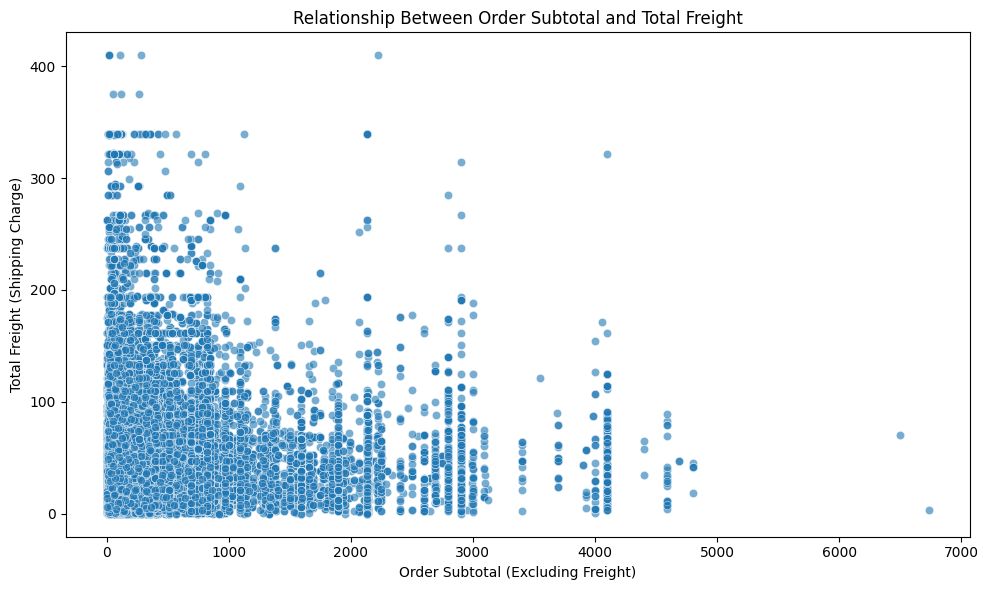

Pearson correlation: -0.0064, p-value: 5.7327e-02
95% CI for Pearson correlation: (-0.0129, 0.0002)
Spearman correlation: -0.0030, p-value: 3.6488e-01

Shapiro-Wilk test results:
Order Subtotal: statistic=0.5628, p-value=2.8457e-77
Total Freight:  statistic=0.8009, p-value=1.6838e-61


In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -----------------------------
# 1. Load the Data
# -----------------------------
# Load order items data – adjust the file path as needed.
df_orderitems = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_OrderItems_new.csv")

# -----------------------------
# 2. Compute Order-Level Aggregates
# -----------------------------
# Calculate order subtotal (sum of prices) and total freight (sum of freight_value) for each order.
df_order_totals = df_orderitems.groupby('order_id').agg(
    order_subtotal = ('price', 'sum'),
    total_freight  = ('freight_value', 'sum')
).reset_index()

print("Order totals preview:")
print(df_order_totals.head())

# -----------------------------
# 3. Visualize the Relationship
# -----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_subtotal', y='total_freight', data=df_order_totals, alpha=0.6)
plt.title("Relationship Between Order Subtotal and Total Freight")
plt.xlabel("Order Subtotal (Excluding Freight)")
plt.ylabel("Total Freight (Shipping Charge)")
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Correlation Analysis
# -----------------------------
# Pearson Correlation (assumes linearity and normality)
pearson_corr, pearson_p = stats.pearsonr(df_order_totals['order_subtotal'], df_order_totals['total_freight'])
print(f"Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4e}")

# Calculate the 95% confidence interval for the Pearson correlation using Fisher's transformation.
def fisher_confidence_interval(r, n, alpha=0.05):
    # Convert r to Fisher's z
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)
    z_lower, z_upper = z - z_crit * se, z + z_crit * se
    return np.tanh(z_lower), np.tanh(z_upper)

n = len(df_order_totals)
ci_lower, ci_upper = fisher_confidence_interval(pearson_corr, n)
print(f"95% CI for Pearson correlation: ({ci_lower:.4f}, {ci_upper:.4f})")

# Spearman Correlation (non-parametric check)
spearman_corr, spearman_p = stats.spearmanr(df_order_totals['order_subtotal'], df_order_totals['total_freight'])
print(f"Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4e}")

# -----------------------------
# 5. Assumption Checks
# -----------------------------

sample_size = 5000 if n > 5000 else n
subtotal_sample = df_order_totals['order_subtotal'].sample(sample_size, random_state=42)
freight_sample  = df_order_totals['total_freight'].sample(sample_size, random_state=42)

shapiro_sub = stats.shapiro(subtotal_sample)
shapiro_freight = stats.shapiro(freight_sample)
print("\nShapiro-Wilk test results:")
print(f"Order Subtotal: statistic={shapiro_sub.statistic:.4f}, p-value={shapiro_sub.pvalue:.4e}")
print(f"Total Freight:  statistic={shapiro_freight.statistic:.4f}, p-value={shapiro_freight.pvalue:.4e}")




**Business Context:**

- No Overcharge for Premium Orders: Shipping fees don’t increase with order value.

- Stable Pricing Policy: No need to change current freight charging practices.

- Shift Focus: Investigate other factors like weight or delivery distance.

**Practical Significance:**

- Negligible Effect Size: Correlation nearly zero; no meaningful relationship.

- Confidence Interval Includes Zero: Reinforces lack of association.

- Actionable Insight: No adjustment in shipping fees based solely on order value is warranted.

C:\Users\srini\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


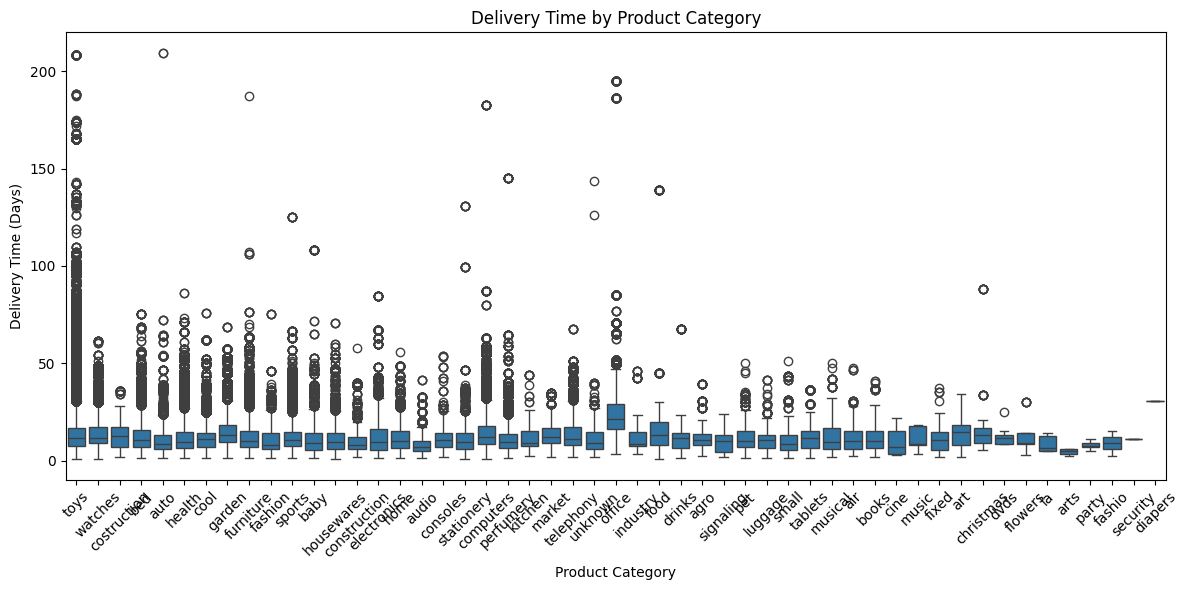

ANOVA Test Results:
                   sum_sq         df           F  PR(>F)
C(category)  3.436776e+06       50.0  813.956012     0.0
Residual     2.105569e+08  2493384.0         NaN     NaN

Shapiro-Wilk Test on Residuals:
Statistic: 0.7806, p-value: 2.3684e-63

Levene's Test for Equal Variances:
Statistic: 183.3142, p-value: 0.0000e+00

Descriptive Statistics with 95% Confidence Intervals (by Product Category):
        category       mean     median        std    count   CI_lower  \
0           agro  12.534939  10.301528   6.699971      755  12.057019   
1            air  12.981429   9.999086   8.924322      276  11.928554   
2            art  14.054719  14.628796   8.831545       15   9.585341   
3           arts   4.529693   4.902865   1.804339        4   2.761441   
4          audio   8.399925   6.901343   6.073681     2561   8.164689   
5           auto  10.286733   8.448125   7.850579    10322  10.135281   
6           baby  11.637407   9.076227  10.337084     5937  11.374459   

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# -----------------------------
# 1. Load the Data
# -----------------------------
# Load orders, order items, and products data (update file paths as needed)
df_orders = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_Orders_new.csv")
df_orderitems = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_OrderItems_new.csv")
df_products = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_Products_new.csv")

# -----------------------------
# 2. Compute Delivery Time per Order
# -----------------------------
# Convert timestamps to datetime and compute delivery time (in days)
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_timestamp'] = pd.to_datetime(df_orders['order_delivered_timestamp'])
df_orders['delivery_time'] = (df_orders['order_delivered_timestamp'] - df_orders['order_purchase_timestamp']).dt.total_seconds() / 86400

# -----------------------------
# 3. Merge Datasets to Link Product Category
# -----------------------------
# Merge orders with order items (by order_id)
df_orders_items = pd.merge(df_orders[['order_id', 'delivery_time']], 
                           df_orderitems, on='order_id', how='inner')

# Merge the result with products to attach the product category (by product_id)
df_full = pd.merge(df_orders_items, 
                   df_products[['product_id', 'category']], on='product_id', how='left')

# Drop rows with missing category information
df_full = df_full.dropna(subset=['category'])

# -----------------------------
# 4. Visualize Delivery Time by Product Category
# -----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='delivery_time', data=df_full)
plt.title("Delivery Time by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Delivery Time (Days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 5. ANOVA: Compare Mean Delivery Times Across Categories
# -----------------------------
model = ols('delivery_time ~ C(category)', data=df_full).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Test Results:")
print(anova_table)

# -----------------------------
# 6. Assumption Checks
# -----------------------------
# (a) Normality of Residuals (Shapiro-Wilk Test)
n_resid = len(model.resid)
sample_size = 5000 if n_resid > 5000 else n_resid
shapiro_test = stats.shapiro(model.resid.sample(sample_size, random_state=42))
print("\nShapiro-Wilk Test on Residuals:")
print(f"Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4e}")

# (b) Homogeneity of Variances (Levene's Test)
categories = df_full['category'].unique()
groups = [df_full[df_full['category'] == cat]['delivery_time'].dropna() for cat in categories]
levene_test = stats.levene(*groups)
print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {levene_test.statistic:.4f}, p-value: {levene_test.pvalue:.4e}")

# -----------------------------
# 7. Descriptive Statistics & 95% Confidence Intervals
# -----------------------------
desc_stats = df_full.groupby('category')['delivery_time'].agg(['mean', 'median', 'std', 'count']).reset_index()
# Compute 95% CI: mean ± 1.96 * (std/sqrt(n))
desc_stats['CI_lower'] = desc_stats['mean'] - 1.96 * (desc_stats['std'] / np.sqrt(desc_stats['count']))
desc_stats['CI_upper'] = desc_stats['mean'] + 1.96 * (desc_stats['std'] / np.sqrt(desc_stats['count']))
print("\nDescriptive Statistics with 95% Confidence Intervals (by Product Category):")
print(desc_stats)



**Business Context**

- Certain categories (e.g., “christmas,” “office,” “food”) appear to have longer delivery times, signaling potential supply chain or vendor issues.

- Results guide negotiations with logistics partners or targeted improvements for slow-delivery categories.

- Reducing wait times for high-variance categories can mitigate negative customer experiences and boost retention.

**Practical Significance**

- A significant p-value (essentially 0) confirms that average delivery times vary by category, but large standard deviations suggest some categories have outlier deliveries.

- Confidence intervals and mean values highlight which categories truly lag; small differences might not warrant major strategy changes.

- Despite non-normality and unequal variances (Shapiro & Levene tests), the robust sample sizes lend credence to the ANOVA findings—focus on categories with substantially longer means for real operational gains.


In [303]:
import pandas as pd
import numpy as np
import math

# Load order items data
df_orderitems = pd.read_csv("C:/Users/srini/Downloads/Ecommerce Order Dataset/Ecommerce Order Dataset/df_OrderItems_new.csv")

# Compute aggregates using .agg() to avoid deprecation warnings.
# Calculate the sum of price and freight_value for each order.
df_order_total = df_orderitems.groupby('order_id', as_index=False).agg(
    price_sum = ('price', 'sum'),
    freight_sum = ('freight_value', 'sum')
)

# Create a new column for total order value.
df_order_total['order_total_value'] = df_order_total['price_sum'] + df_order_total['freight_sum']

# Calculate sample statistics.
mean_order = df_order_total['order_total_value'].mean()
std_order = df_order_total['order_total_value'].std()
n = df_order_total['order_total_value'].count()

# Compute the standard error and margin of error (using z=1.96 for 95% CI)
se = std_order / math.sqrt(n)
margin_error = 1.96 * se

ci_lower = mean_order - margin_error
ci_upper = mean_order + margin_error

print("Sample Mean Order Value: {:.2f}".format(mean_order))
print("95% Confidence Interval: [{:.2f}, {:.2f}]".format(ci_lower, ci_upper))


Sample Mean Order Value: 385.18
95% Confidence Interval: [381.52, 388.85]
